## Exercise 4: Iterative solution to the 2D Schödinger equation
**Aim**: Extend the iterative approach to 2D

**Suggestion**: Adapt the 1D class and modify necessary functions accordingly

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# create class 


### (1) Extend all 1D vectors to 2D.

### (2) Extend the following routines to 2D: `get_laplacian`, `normalize`, `dot_product`

### (3) Plot the 2D-wavefunctions.

### (4) Animate iterative improvement/evolution of the wavefunction.

You can use the function `figure_with_slider` provided below.  You need to give the function

    xx - 2d numpy array for the x-axis
    yy - 2d numpy array for the y-axis
    zz_list - list of 2d numpy arrays for the z-axis
    vmin, vmax - min and max defining the scale of the contour plots
    
Once given, yu can interact with the plot by clicking on the blue slider.

In [3]:
from matplotlib.contour import QuadContourSet
from matplotlib.widgets import Slider

%matplotlib notebook

def figure_with_slider(xx, yy, zz_list, nmax, vmin=-1., vmax=1.):
    plt.figure(figsize=(5, 5))
    hf = plt.contourf(xx, yy, zz_list[0], 100, cmap='viridis',
                      vmin=vmin, vmax=vmax)
    contour_axis = plt.gca()

    axslider   = plt.axes([0.15, 0.15, 0.65, 0.03])     #slider loc and size
    propslider = Slider(axslider, '', 0, 1, 
                        0., color='lightblue')  #slider properties

    def update(val):
        t = propslider.val
        ii = int(np.round(nmax*t)) - 1
        contour_axis.clear()
        contour_axis.contourf(xx, yy, zz_list[ii], 50, cmap='viridis',
                    vmin=vmin, vmax=vmax)

    propslider.on_changed(update)  

<IPython.core.display.Javascript object>


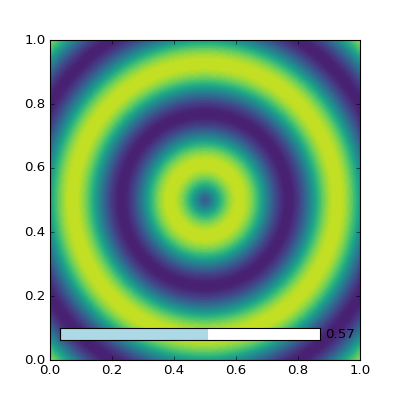

In [4]:
xvar = np.linspace(0, 1, 101)
yvar = np.linspace(0, 1, 101)
xx, yy = np.meshgrid(xvar, yvar)

lambda1 = 20
eta = 4

def get_zz(xx, yy, t, lambda1=20, eta=4):
    rr = ((xx-.5)**2. + (yy-0.5)**2.)**(1./2.)
    zz = np.cos(rr*lambda1-t*eta)
    return zz

nmax = 101
zz_list = [get_zz(xx, yy, t, lambda1=lambda1, eta=eta) 
           for t in np.linspace(0., 1., nmax)]

figure_with_slider(xx, yy, zz_list, nmax, vmin=-1.2, vmax=1.2)